In [99]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from PIL import Image
from numpy import asarray
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [100]:
filename1 = './images/tom_cruise_1.jpg'
filename2 = './images/tom_cruise_2.jpg'

In [101]:
def extract_face_from_image(image_path, required_size=(224, 224)):
    image = pyplot.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height
        face_boundary = image[y1:y2, x1:x2]

        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

1/1 [==============================] - 0s 119ms/step


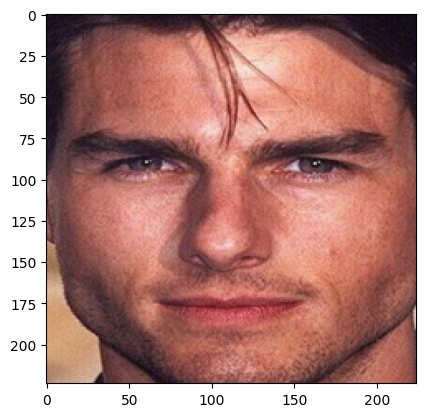

In [102]:
extracted_face_1 = extract_face_from_image(filename1)
pyplot.imshow(extracted_face_1[0])
pyplot.show()

1/1 [==============================] - 0s 112ms/step


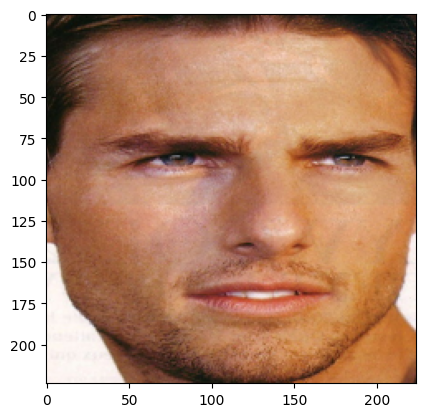

In [103]:
extracted_face_2 = extract_face_from_image(filename2)
pyplot.imshow(extracted_face_2[0])
pyplot.show()

In [104]:
sample_1 = asarray(extracted_face_1, 'float32')
sample_1 = preprocess_input(sample_1, version=2)

sample_2 = asarray(extracted_face_2, 'float32')
sample_2 = preprocess_input(sample_2, version=2)

print(sample_1.shape)

print(sample_2.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [105]:
model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

In [106]:
final_face_1 = model.predict(sample_1)
final_face_2 = model.predict(sample_2)

1/1 [==============================] - 0s 87ms/step


In [107]:
cosinevalue = cosine(final_face_1[0], final_face_2[0])
print(f'The similarity between the faces is {round((1 - cosinevalue) * 100, 2)} percent.')

The similarity between the faces is 85.54 percent.
